# Second Classifier

Classify the data without either price or duration features.

## Imports

In [1]:
from itertools import chain
import html
import ujson as json
import multiprocessing as mp
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold

from helpers import all_scoring_metrics
from helpers import draw_rocs

%matplotlib inline
sns.set(font='monospace')

num_folds = 10
eval_columns = ['f1',
                'accuracy',
                'true_negative_rate',
                'true_positive_rate',
                'roc_auc',
                'roc_fpr',
                'roc_tpr',
                'roc_thresholds']
price_cols = ['duration_in_mins',
              'price',
              'price_per_min']

In [2]:
df = pd.read_pickle('../../data/merged/data_to_use_by_phone_v4.pkl')
print(df.shape)
print(df['class'].value_counts())

(567, 150)
False    508
True      59
Name: class, dtype: int64


In [3]:
id_cols = {'class', 'phone'}
price_cols = {x for x in df.columns if x.find('price') > -1}
duration_cols = {x for x in df.columns if x.find('duration') > -1}
flag_cols = {x for x in df.columns if x.find('flag_') > -1}
ethnicity_cols = {x for x in df.columns if x.find('ethnicity_') > -1}

In [4]:
etc = ExtraTreesClassifier(oob_score=True,
                           bootstrap=True,
                           random_state=2,
                           n_estimators=100,
                           n_jobs=-1,
                           class_weight="balanced")

rf = RandomForestClassifier(oob_score=True,
                            random_state=2,
                            n_estimators=100,
                            n_jobs=-1,
                            class_weight="balanced")

## Execution!

In [5]:
y_series = df['class']
X_df = df.loc[:, sorted(set(df.columns) - id_cols - price_cols - duration_cols)]
print(y_series.shape)
print(X_df.shape)

(567,)
(567, 100)


### Extra Trees

In [6]:
etc_metrics = all_scoring_metrics(etc, X_df, y_series, StratifiedKFold(y_series, num_folds))

In [7]:
this_metrics = etc_metrics
print(this_metrics.roc_auc.mean())
this_metrics.loc[:, ['f1', 'accuracy', 'true_negative_rate', 'true_positive_rate', 'roc_auc']]

0.8647058823529413


,f1,accuracy,true_negative_rate,true_positive_rate,roc_auc
0,0.250000,0.894737,0.980392,0.166667,0.797386
1,0.000000,0.824561,0.921569,0.000000,0.733660
2,0.000000,0.877193,0.980392,0.000000,0.638889
3,0.153846,0.807018,0.882353,0.166667,0.892157
4,0.142857,0.789474,0.862745,0.166667,0.854575
5,0.285714,0.912281,1.000000,0.166667,0.936275
6,0.444444,0.912281,0.980392,0.333333,0.857843
7,0.285714,0.912281,1.000000,0.166667,0.936275
8,1.000000,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000,1.000000


missing_exp_ads_from_simimages_count:mean    0.036455
missing_exp_ads_from_simimages_count:max     0.031383
missing_similar_images_count:max             0.028768
missing_similar_images_count:50%             0.028527
missing_exp_ads_from_simimages_count:50%     0.027553
missing_similar_images_count:std             0.026427
missing_similar_images_count:mean            0.026383
missing_exp_ads_from_simimages_count:75%     0.024897
missing_exp_ads_from_simimages_count:std     0.022770
flag_Juvenile                                0.022339
missing_similar_images_count:75%             0.019417
missing_age:std                              0.018995
n_incall_and_outcall                         0.018927
n_incall                                     0.017645
images_count:min                             0.017269
images_count:75%                             0.015872
age:min                                      0.015597
n_cooccurring_phones                         0.015534
n_ads                       

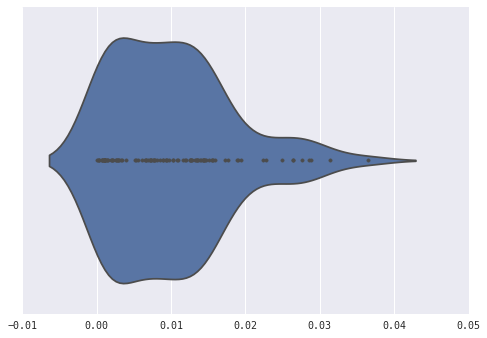

In [8]:
ranked_imptncs = this_metrics.loc[:,
                                  sorted(set(this_metrics.columns) - 
                                         set(eval_columns))].mean().sort_values(ascending=False)
print(ranked_imptncs.head(20))
sns.violinplot(ranked_imptncs, inner='point')

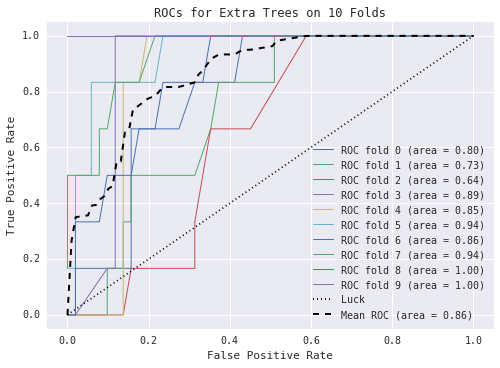

In [9]:
draw_rocs(this_metrics, 'Extra Trees')

### Random Forest

In [10]:
rf_metrics = all_scoring_metrics(rf, X_df, y_series, StratifiedKFold(y_series, num_folds))

In [11]:
this_metrics = rf_metrics
print(this_metrics.roc_auc.mean())
this_metrics.loc[:, ['f1', 'accuracy', 'true_negative_rate', 'true_positive_rate', 'roc_auc']]

0.8712418300653596


,f1,accuracy,true_negative_rate,true_positive_rate,roc_auc
0,0.250000,0.894737,0.980392,0.166667,0.885621
1,0.000000,0.807018,0.901961,0.000000,0.751634
2,0.000000,0.877193,0.980392,0.000000,0.581699
3,0.400000,0.842105,0.882353,0.500000,0.893791
4,0.000000,0.771930,0.862745,0.000000,0.852941
5,0.500000,0.929825,1.000000,0.333333,0.952614
6,0.444444,0.912281,0.980392,0.333333,0.857843
7,0.285714,0.912281,1.000000,0.166667,0.936275
8,1.000000,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000,1.000000


missing_exp_ads_from_simimages_count:mean     0.048397
missing_similar_images_count:mean             0.046173
age:min                                       0.040083
age:count                                     0.034107
age:mean                                      0.029805
n_ads                                         0.024539
missing_similar_images_count:count            0.023984
flag_Juvenile                                 0.022391
missing_age:count                             0.021887
missing_exp_ads_from_simimages_count:count    0.021461
age:std                                       0.021283
similar_images_count:25%                      0.019891
missing_exp_ads_from_simimages_count:std      0.019112
missing_similar_images_count:std              0.018925
similar_images_count:75%                      0.018118
images_count:25%                              0.018116
images_count:mean                             0.017846
age:max                                       0.017666
images_cou

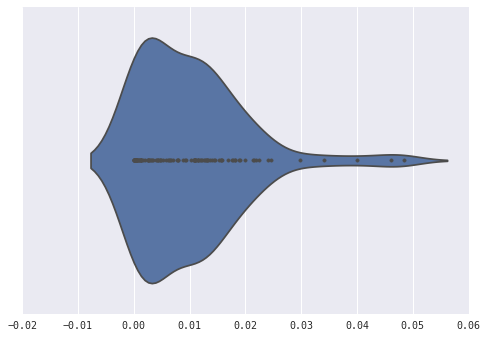

In [12]:
ranked_imptncs = this_metrics.loc[:,
                                  sorted(set(this_metrics.columns) - 
                                         set(eval_columns))].mean().sort_values(ascending=False)
print(ranked_imptncs.head(20))
sns.violinplot(ranked_imptncs, inner='point')

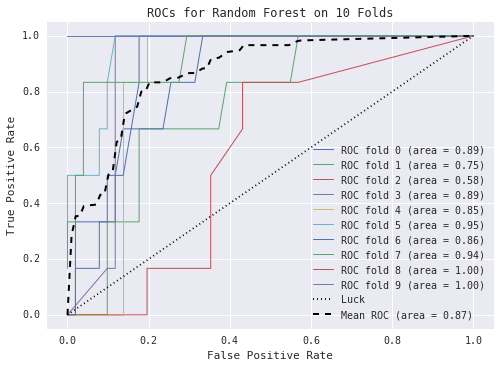

In [13]:
draw_rocs(this_metrics, 'Random Forest')